# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

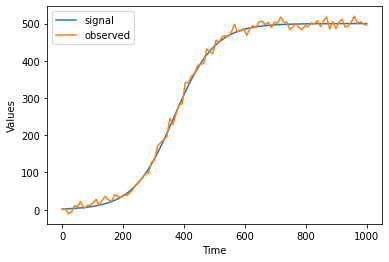

In [8]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
controller = pints.NestedController(log_likelihood, log_prior,
                                    method=pints.NestedEllipsoidSampler)

# Set number of iterations
controller.set_iterations(8000)

# Set the number of posterior samples to generate
controller.set_n_posterior_samples(1600)

# Do proposals in parallel
controller.set_parallel(True)

# Use dynamic enlargement factor
controller.sampler().set_dynamic_enlargement_factor(1)

Run the sampler!

In [3]:
samples = controller.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.1 -inf          1             
0     2       0:00.1 -inf          1             
0     21      0:00.2 -inf          1             
0     41      0:00.2 -inf          1             
0     61      0:00.2 -inf          1             
0     81      0:00.3 -inf          1             
0     101     0:00.3 -inf          1             
0     121     0:00.3 -inf          1             
0     141     0:00.4 -inf          1             
0     161     0:00.4 -inf          1             
0     181     0:00.4 -inf          1             
0     201     0:00.5 -inf          1             
0     221     0:00.5 -inf          1             
0     241     0:00.5 -inf          1             
0     261     0:00.6 -inf          1             
0     281     0:00.6 -inf          1             
0     301    

2860  12376   0:05.5 -13.28965837  0.238810955   
2880  12448   0:05.6 -12.94976003  0.239043825   
2900  12496   0:05.6 -12.61465063  0.239748677   
2920  12568   0:05.6 -12.27870946  0.239973702   
2940  12616   0:05.7 -11.94871239  0.240667976   
2960  12664   0:05.7 -11.63882644  0.241356817   
2980  12736   0:05.7 -11.3359872   0.24156939    
3000  12808   0:05.7 -11.04189387  0.241779497   
3020  12880   0:05.8 -10.74419104  0.241987179   
3040  12952   0:05.8 -10.44498047  0.242192479   
3060  13024   0:05.8 -10.15855277  0.242395437   
3080  13096   0:05.9 -9.874572638  0.242596093   
3100  13192   0:05.9 -9.59251092   0.242338962   
3120  13192   0:05.9 -9.312447487  0.243902439   
3140  13240   0:05.9 -9.032464398  0.244548287   
3160  13264   0:06.0 -8.753290159  0.245646766   
3180  13288   0:06.0 -8.489369292  0.246741155   
3200  13312   0:06.0 -8.225936212  0.247831475   
3220  13360   0:06.0 -7.973927384  0.24845679    
3240  13384   0:06.0 -7.732577965  0.249537893   


## Plot posterior samples versus true parameter values (dashed lines)

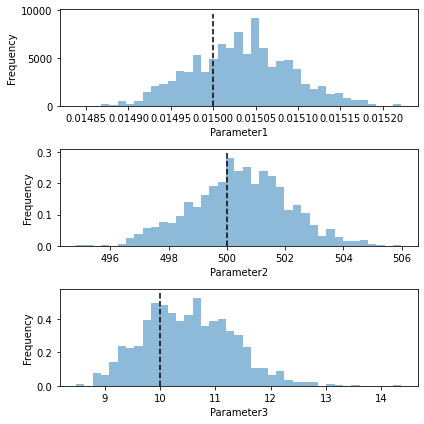

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

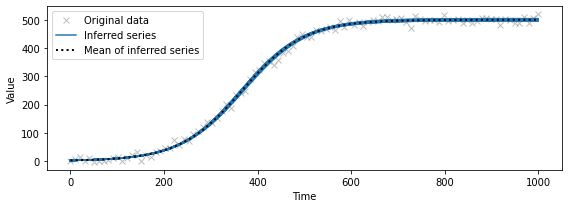

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(controller.marginal_log_likelihood())
      + ' ± ' + str(controller.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -385.5009854682867 ± 0.0773574167218967


## Effective sample size

In [7]:
print('effective sample size = ' + str(controller.effective_sample_size()))

effective sample size = 1644.798481950151
